In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T 
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255.
_,m_train = X_train.shape

In [3]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5

    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def deriv_ReLU(Z):
    return Z>0

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1 
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    # print(W2.shape)
    # print(A1.shape)
    A2 = softmax(Z2)
    # print(A2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ2.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1- alpha*dW1
    b1 = b1- alpha*np.reshape(db1, (10,1))
    W2 = W2- alpha*dW2
    b2 = b2- alpha*np.reshape(db2, (10,1))
    return W1, b1, W2, b2

In [4]:
def get_predictions(A2):
    return np.argmax(A2, 0)
    
def get_accuracy(prediction, Y):
    print(prediction, Y)
    return np.sum(prediction == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        # print(X.shape)
        if ( i %50 == 0):
            print("iteration : ", i)
            print("accuracy : ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [5]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1001, 0.10)

iteration :  0
[0 7 0 ... 0 0 7] [9 4 4 ... 5 6 5]
accuracy :  0.09363414634146341
iteration :  50
[9 9 4 ... 2 6 2] [9 4 4 ... 5 6 5]
accuracy :  0.5455121951219513
iteration :  100
[9 9 4 ... 5 6 5] [9 4 4 ... 5 6 5]
accuracy :  0.692780487804878
iteration :  150
[9 4 4 ... 5 6 5] [9 4 4 ... 5 6 5]
accuracy :  0.7829756097560976
iteration :  200
[9 4 4 ... 5 6 5] [9 4 4 ... 5 6 5]
accuracy :  0.8092926829268293
iteration :  250
[9 4 4 ... 5 6 5] [9 4 4 ... 5 6 5]
accuracy :  0.8256097560975609
iteration :  300
[9 4 4 ... 5 6 5] [9 4 4 ... 5 6 5]
accuracy :  0.8380243902439024
iteration :  350
[9 4 4 ... 5 6 5] [9 4 4 ... 5 6 5]
accuracy :  0.8468536585365853
iteration :  400
[9 4 4 ... 5 6 5] [9 4 4 ... 5 6 5]
accuracy :  0.8536585365853658
iteration :  450
[9 4 4 ... 5 6 5] [9 4 4 ... 5 6 5]
accuracy :  0.859390243902439
iteration :  500
[9 4 4 ... 5 6 5] [9 4 4 ... 5 6 5]
accuracy :  0.8635365853658536
iteration :  550
[9 4 4 ... 5 6 5] [9 4 4 ... 5 6 5]
accuracy :  0.8676829268292

In [6]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


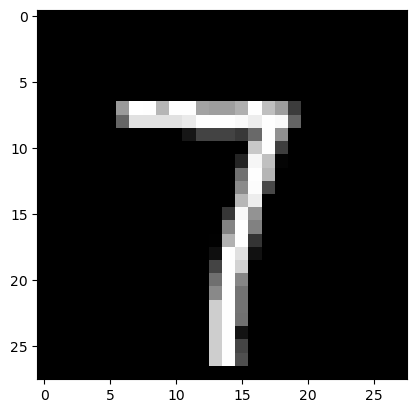

Prediction:  [2]
Label:  2


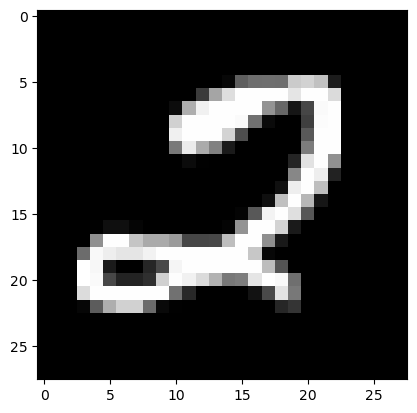

Prediction:  [2]
Label:  2


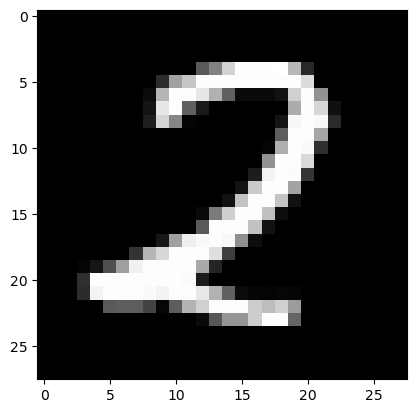

Prediction:  [0]
Label:  0


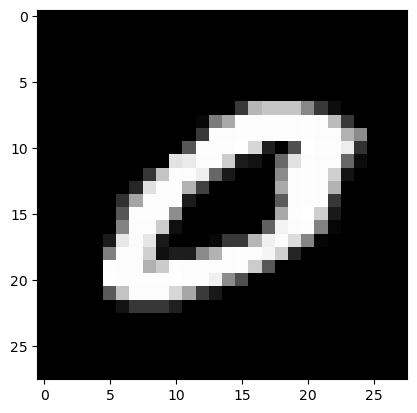

In [8]:
test_prediction(12, W1, b1, W2, b2)
test_prediction(30, W1, b1, W2, b2)
test_prediction(18, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)